In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid", {"grid.color": ".6"})

In [2]:
path = 'raw/Data.csv'
survey_df = pd.read_csv(path, sep=';', index_col='ID')
survey_df

,Trip Frequency,Age,Gender,Seat sit 1,Seat sit 2,Seat sit 3
ID,,,,,,
1,1-3 times per week,25-34,Male,8,30,4
2,1-3 times per week,35-44,Female,32,37,39
3,More than 4 times per week,25-34,Female,19,14,14
4,1-3 times per week,18-24,Male,32,16,20
5,Once a month,25-34,Male,10,23,39
...,...,...,...,...,...,...
509,1-3 times per week,18-24,Female,9,15,21
510,1-3 times per week,35-44,Male,9,12,10
511,More than 4 times per week,25-34,Female,30,12,17


In [3]:
survey_df.sort_values('Seat sit 1')['Seat sit 1'].value_counts()

32    108
7      73
22     39
31     37
9      34
30     34
34     27
8      25
10     24
19     20
5      19
29     19
6       9
17      6
33      6
36      6
18      4
21      4
24      4
20      4
3       2
14      2
11      2
28      1
16      1
12      1
35      1
37      1
Name: Seat sit 1, dtype: int64

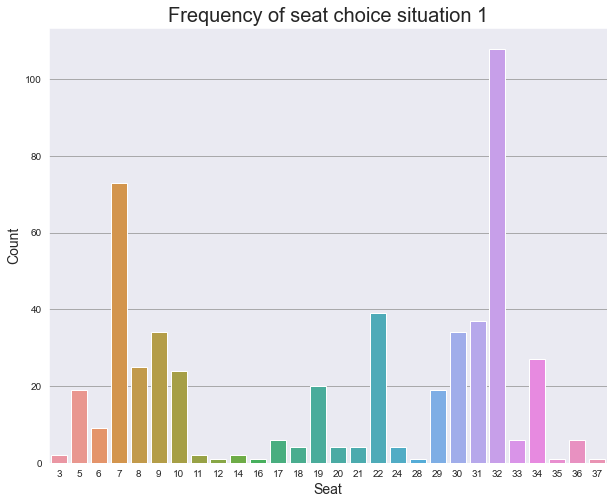

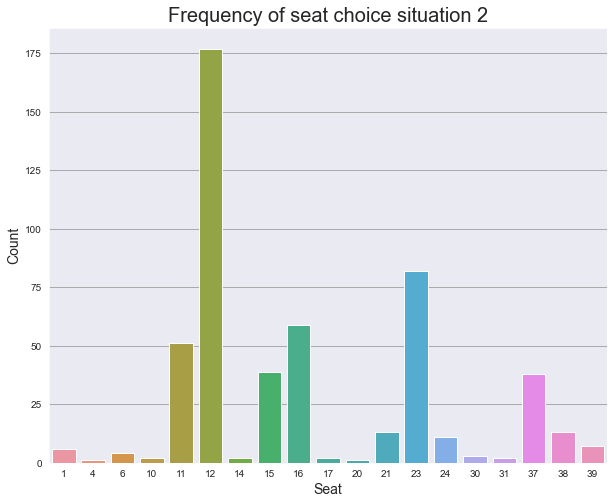

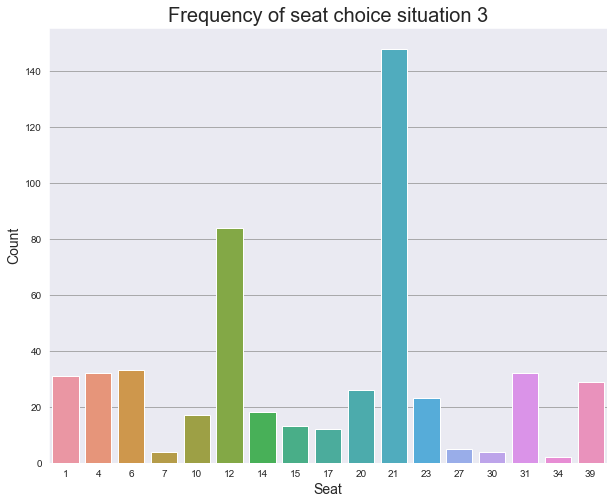

In [4]:
situations = [1, 2, 3]

for situation in situations:
    fig, ax = plt.subplots(1, 1, figsize=(10,8))
    #sns.countplot(data=survey_df, x=f'Seat sit {situation}', hue='Gender', ax=ax)
    sns.countplot(data=survey_df, x=f'Seat sit {situation}', ax=ax)
    ax.set_title(f'Frequency of seat choice situation {situation}', fontsize=20)
    ax.set_xlabel('Seat', fontsize=14)
    ax.set_ylabel('Count', fontsize=14)

    fig.savefig(f'figures/frequency_sit_{situation}.png')

In [5]:
grid = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19,
       2, 4, 6, 8, 10, 12, 14, 16, 18, 20,
       21, 23, 25, 27, 29, 31, 33, 35, 37, 39,
       22, 24, 26, 28, 30, 32, 34, 36, 38, 40]

taken_sit_1 = [2, 13, 26, 39, 40]
taken_sit_2 = [2, 3, 5, 8, 9, 13, 18, 18, 22, 25, 26, 28, 29, 32, 33, 35, 36, 40]
taken_sit_3 = [2, 3, 5, 8, 9, 11, 13, 16, 18, 19, 22, 24, 25, 26, 28, 29, 32, 33, 35, 36, 37, 38, 40]

grid = np.array(grid).reshape(4,10)
grid

array([[ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19],
       [ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20],
       [21, 23, 25, 27, 29, 31, 33, 35, 37, 39],
       [22, 24, 26, 28, 30, 32, 34, 36, 38, 40]])

In [6]:
dict_sit1 = survey_df.sort_values('Seat sit 1')['Seat sit 1'].value_counts().to_dict()
dict_sit2 = survey_df.sort_values('Seat sit 2')['Seat sit 2'].value_counts().to_dict()
dict_sit3 = survey_df.sort_values('Seat sit 3')['Seat sit 3'].value_counts().to_dict()

seats = grid
my_dict = dict_sit1

def make_count_array(seats, my_dict):
    total_counts = []
    for aisle in seats:
        if len(total_counts) == 2:
            aisle_counts = [0 for _ in range(len(total_counts[0]))]
            total_counts.append(aisle_counts)
        aisle_counts = []
        for row in aisle:
            count = my_dict.get(row, 0)
            aisle_counts.append(count)
        total_counts.append(aisle_counts)
    counts_array = np.array(total_counts)
    return counts_array

taken_list = taken_sit_1

def make_taken_array(seats, taken_list):
    total_taken = []
    for aisle in seats:
        aisle_taken = []
        if len(total_taken) == 2:
            aisle_taken = [0 for _ in range(len(total_taken[0]))]
            total_taken.append(aisle_taken)
        aisle_taken = []
        for row in aisle:
            if row in taken_list:
                taken = 1
            else:
                taken = 0
            aisle_taken.append(taken)
        total_taken.append(aisle_taken)
    taken_array = np.array(total_taken)
    return taken_array

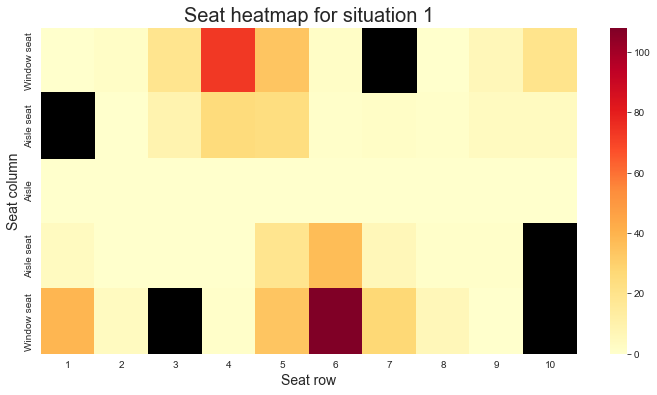

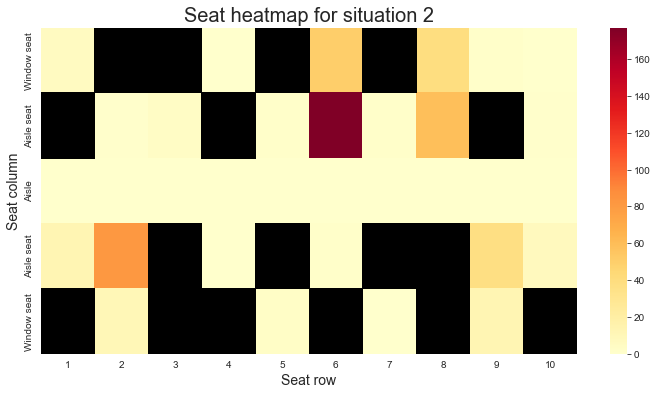

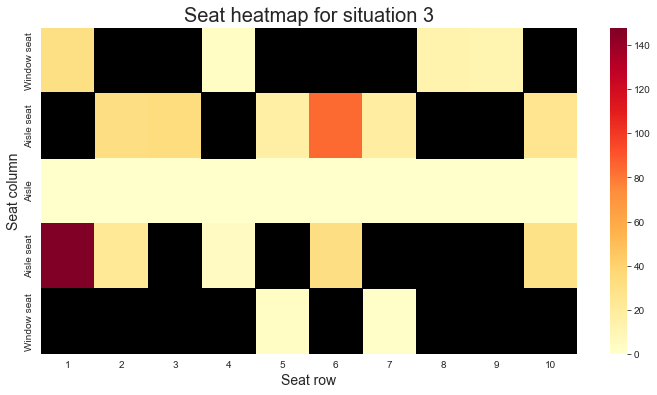

In [36]:
dicts = [dict_sit1, dict_sit2, dict_sit3]
taken_arrays = [taken_sit_1, taken_sit_2, taken_sit_3]

for index in range(len(dicts)):
    situation = index + 1
    counts_array = make_count_array(grid, dicts[index])
    taken_array = make_taken_array(grid, taken_arrays[index])

    fig, ax = plt.subplots(1, 1, figsize=(12,6))
    sns.heatmap(data=counts_array, ax=ax, cmap='YlOrRd')
    sns.heatmap(data=taken_array, mask=taken_array==0, cmap='gist_gray', cbar=False, ax=ax)
    columns = ['Window seat', 'Aisle seat', 'Aisle', 'Aisle seat', 'Window seat']
    rows = [str(i+1) for i in range(len(dicts[index]))]
    ax.set_title(f'Seat heatmap for situation {situation}', fontsize=20)
    ax.set_xlabel('Seat row', fontsize=14)
    ax.set_ylabel('Seat column', fontsize=14)
    ax.set_xticklabels(rows)
    ax.set_yticklabels(columns)
    
    fig.savefig(f'figures/heatmap_situation_{situation}.png')


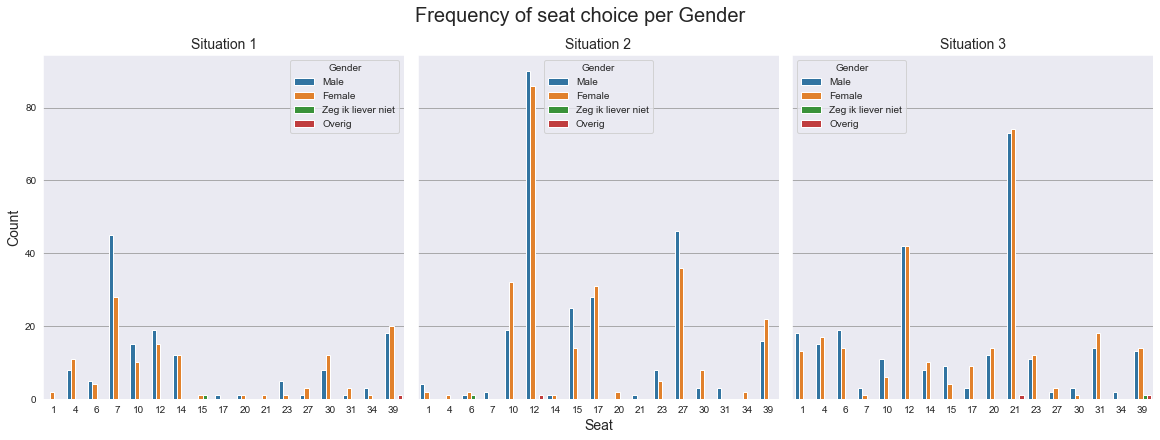

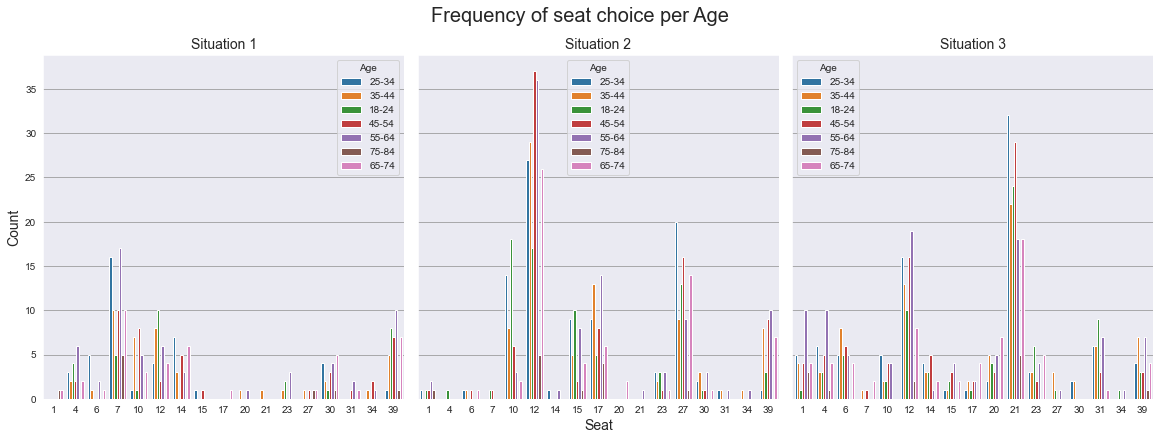

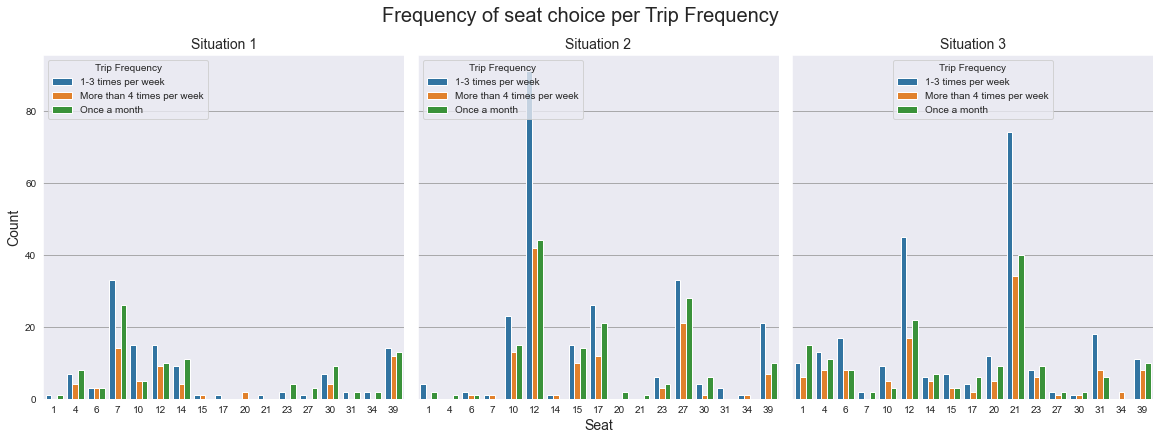

In [13]:
hues = ['Gender', 'Age', 'Trip Frequency']

for hue in hues:

    situations = [1, 2, 3]
    
    fig, ax = plt.subplots(1, 3, figsize=(16,6), sharey=True, sharex=True, constrained_layout=True)
    for situation in situations:
#         fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
        i = situation - 1
        sns.countplot(data=survey_df, x=f'Seat sit {situation}', hue=hue, ax=ax[i])
        #sns.histplot(data=survey_df, x=f'Seat sit {situation}', hue=hue, ax=ax[i], kde=True, binwidth=1)
        #sns.countplot(data=survey_df, x=f'Seat sit {situation}', ax=ax)
        fig.suptitle(f'Frequency of seat choice per {hue}', fontsize=20)
        
        ax[i].set_title(f'Situation {situation}', fontsize=14)
        if i == 0:
            y_label = 'Count'
        else:
            y_label=''
        if i == 1:
            x_label = 'Seat'
        else:
            x_label = ''
        ax[i].set_ylabel(y_label, fontsize=14)
        ax[i].set_xlabel(x_label, fontsize=14)

    fig.savefig(f'figures/frequency_per_{hue}.png')

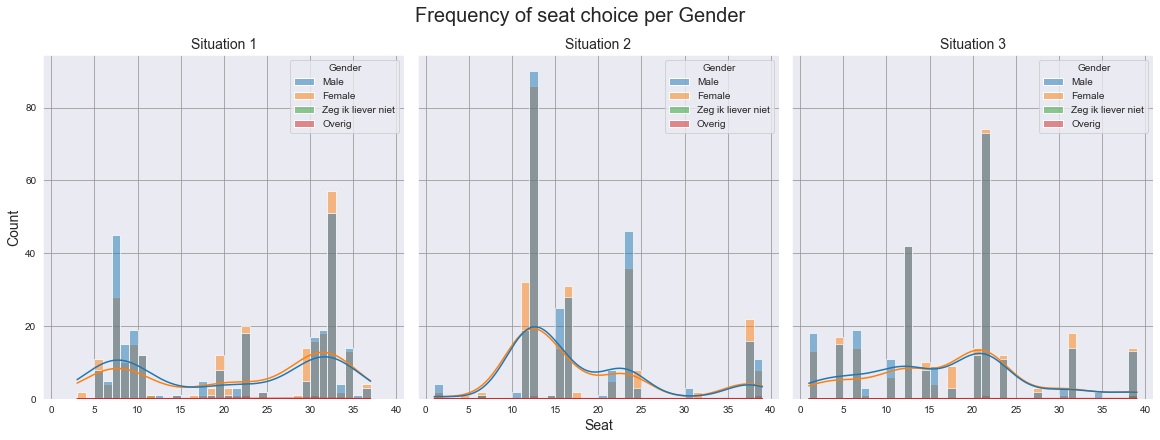

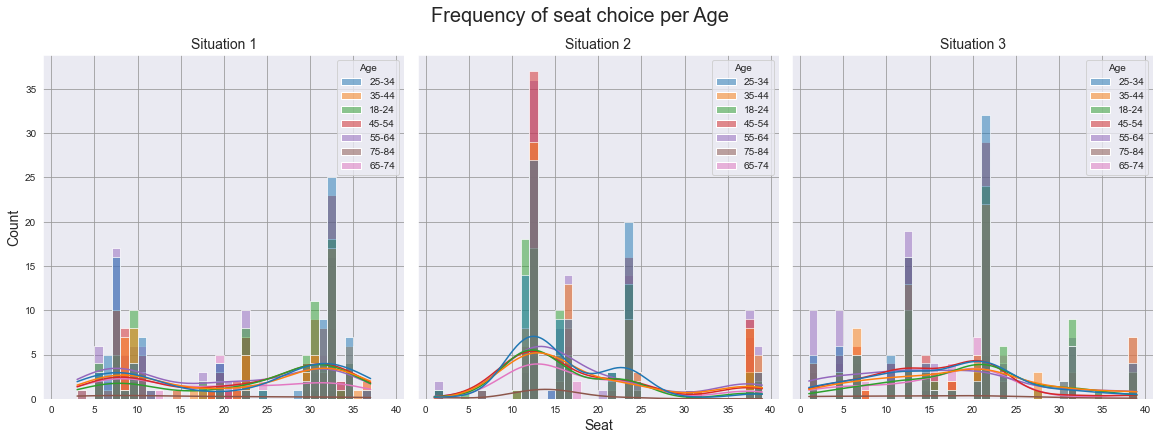

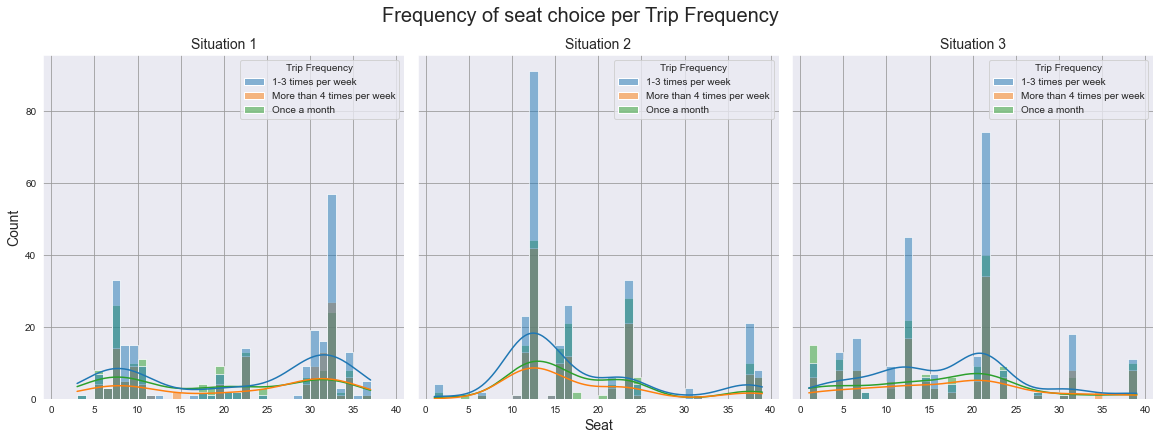

In [14]:
for hue in hues:

    situations = [1, 2, 3]
    
    fig, ax = plt.subplots(1, 3, figsize=(16,6), sharey=True, sharex=True, constrained_layout=True)
    for situation in situations:
#         fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
        i = situation - 1
        #sns.countplot(data=survey_df, x=f'Seat sit {situation}', hue=hue, ax=ax[i])
        sns.histplot(data=survey_df, x=f'Seat sit {situation}', hue=hue, ax=ax[i], kde=True, binwidth=1)
        #sns.countplot(data=survey_df, x=f'Seat sit {situation}', ax=ax)
        fig.suptitle(f'Frequency of seat choice per {hue}', fontsize=20)
        
        ax[i].set_title(f'Situation {situation}', fontsize=14)
        if i == 0:
            y_label = 'Count'
        else:
            y_label=''
        if i == 1:
            x_label = 'Seat'
        else:
            x_label = ''
        ax[i].set_ylabel(y_label, fontsize=14)
        ax[i].set_xlabel(x_label, fontsize=14)

    fig.savefig(f'figures/frequency_per_{hue}_with_trend.png')

In [ ]:
for hue in hues:

    situations = [1, 2, 3]
    
    fig, ax = plt.subplots(1, 3, figsize=(16,6), sharey=True, sharex=True, constrained_layout=True)
    for situation in situations:
#         fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
        i = situation - 1
        #sns.countplot(data=survey_df, x=f'Seat sit {situation}', hue=hue, ax=ax[i])
        sns.histplot(data=survey_df, x=f'Seat sit {situation}', hue=hue, ax=ax[i], kde=True, binwidth=1)
        #sns.countplot(data=survey_df, x=f'Seat sit {situation}', ax=ax)
        fig.suptitle(f'Frequency of seat choice per {hue}', fontsize=20)
        
        ax[i].set_title(f'Situation {situation}', fontsize=14)
        if i == 0:
            y_label = 'Count'
        else:
            y_label=''
        if i == 1:
            x_label = 'Seat'
        else:
            x_label = ''
        ax[i].set_ylabel(y_label, fontsize=14)
        ax[i].set_xlabel(x_label, fontsize=14)

    fig.savefig(f'figures/frequency_per_{hue}_normalized.png')

In [17]:
copy_df = survey_df.groupby(by=['Age', 'Seat sit 1']).count()
copy_df

Trip Frequency  Gender  Seat sit 2  Seat sit 3
Age   Seat sit 1                                                
18-24 5                        4       4           4           4
      7                        5       5           5           5
      8                        1       1           1           1
      9                       10      10          10          10
      17                       2       2           2           2
...                          ...     ...         ...         ...
75-84 19                       1       1           1           1
      22                       1       1           1           1
      30                       1       1           1           1
      32                       1       1           1           1
      36                       1       1           1           1

[116 rows x 4 columns]

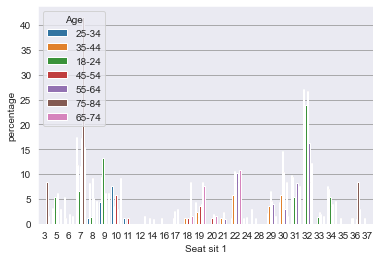

In [19]:
# Plot percentage of occupation per income class
grouped = survey_df.groupby(['Age'], sort=False)
counts = grouped['Seat sit 1'].value_counts(normalize=True, sort=False)

data = [
    {'Seat sit 1': seat, 'Age': age, 'percentage': percentage*100} for 
    (age, seat), percentage in dict(counts).items()
]

df = pd.DataFrame(data)

p = sns.barplot(x="Seat sit 1", y="percentage", hue="Age", data=df)

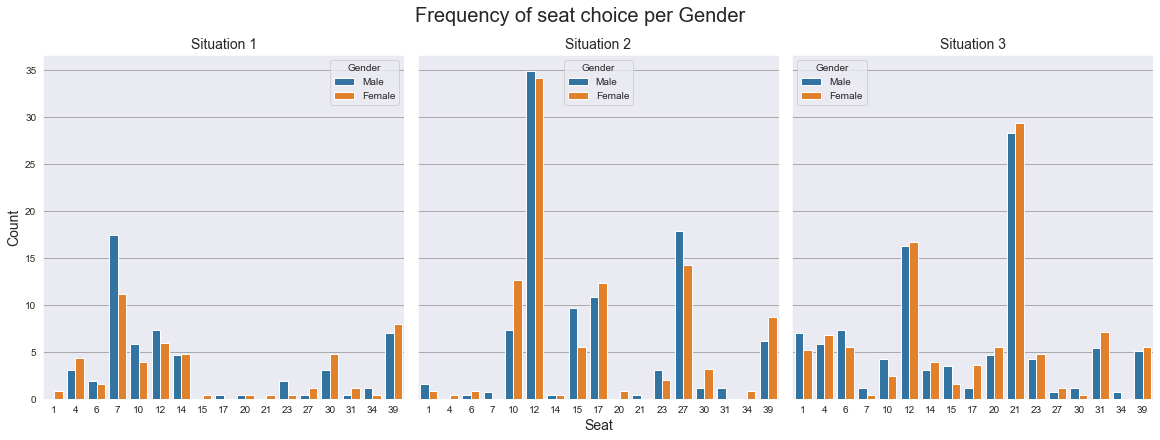

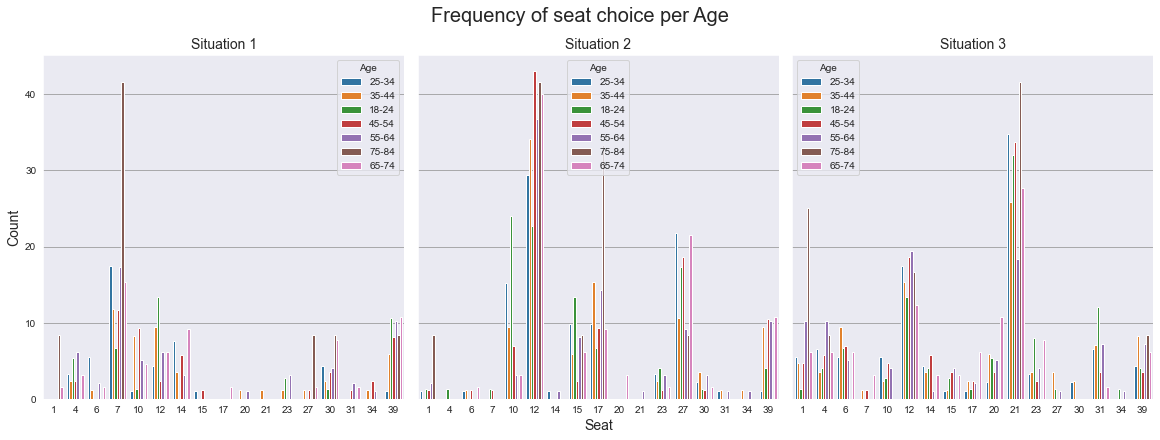

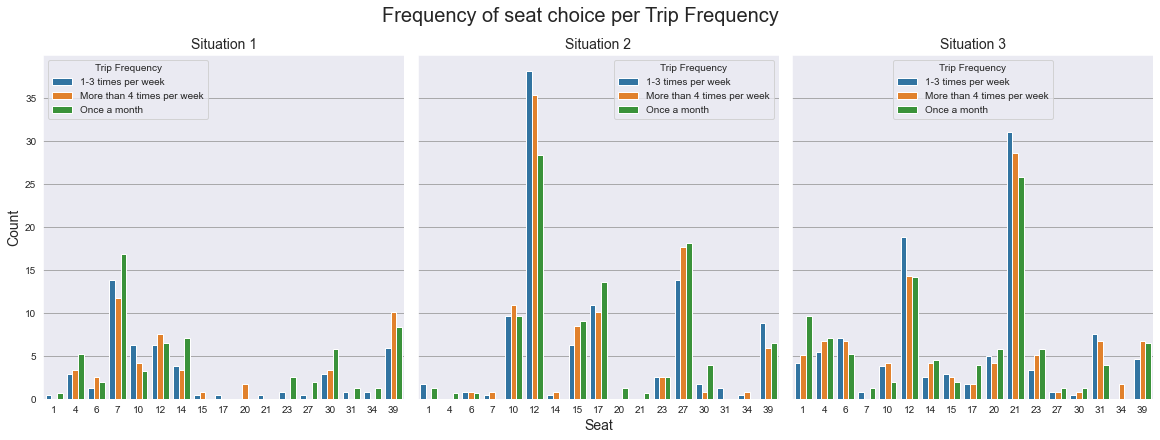

In [34]:
for hue in hues:

    situations = [1, 2, 3]
    
    fig, ax = plt.subplots(1, 3, figsize=(16,6), sharey=True, sharex=True, constrained_layout=True)
    
    
    for situation in situations:
        
        if hue == 'Gender':
            df = survey_df[(survey_df.Gender != 'Overig') & (survey_df.Gender != 'Zeg ik liever niet')]
#             df = survey_df[survey_df['Age'] != 'Overig']
#             df = df[df['Age'] != 'Zeg ik liever nier=t']
        else:
            df = survey_df
        
        grouped = df.groupby([hue], sort=False)
        counts = grouped[f'Seat sit {situation}'].value_counts(normalize=True, sort=False)

        data = [
            {f'Seat sit {situation}': seat, hue: thingy, 'percentage': percentage*100} for 
            (thingy, seat), percentage in dict(counts).items()
        ]

        df = pd.DataFrame(data)
        
#         fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=1)
        i = situation - 1
    
        sns.barplot(x=f'Seat sit {situation}', y="percentage", hue=hue, data=df, ax=ax[i])
        #sns.countplot(data=survey_df, x=f'Seat sit {situation}', hue=hue, ax=ax[i])
        #sns.histplot(data=survey_df, x=f'Seat sit {situation}', hue=hue, ax=ax[i], kde=True, binwidth=1)
        #sns.countplot(data=survey_df, x=f'Seat sit {situation}', ax=ax)
        fig.suptitle(f'Frequency of seat choice per {hue}', fontsize=20)
        
        ax[i].set_title(f'Situation {situation}', fontsize=14)
        if i == 0:
            y_label = 'Count'
        else:
            y_label=''
        if i == 1:
            x_label = 'Seat'
        else:
            x_label = ''
        ax[i].set_ylabel(y_label, fontsize=14)
        ax[i].set_xlabel(x_label, fontsize=14)

    fig.savefig(f'figures/frequency_per_{hue}_normalized.png')